San Francisco crime data from city open data website analyzed with pandas with visualizations in matplotlib.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\IPython\core\interactiveshell.py:3035: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
from datetime import datetime, time
CRIME_DATE_FORMAT = '%m/%d/%Y %H:%M:%S %p'

In [4]:
sf = pd.read_csv('sf_crimes.csv')

In [4]:
sf.columns

Index([u'IncidntNum', u'Category', u'Descript', u'DayOfWeek', u'Date', u'Time',
       u'PdDistrict', u'Resolution', u'Address', u'X', u'Y', u'Location'],
      dtype='object')

In [5]:
def to_time(x):
    hour, minute = x.split(':')
    return time(int(hour), int(minute))

In [6]:
sf.columns = sf.columns.map(str.lower)

In [7]:
sf.date = pd.to_datetime(sf.date, format=CRIME_DATE_FORMAT)
sf.time = sf.time.map(to_time)

In [8]:
sf.head()

,incidntnum,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location
0,140090226,WARRANTS,ENROUTE TO PAROLE OFFICER,Thursday,2014-01-30 12:00:00,21:56:00,MISSION,"ARREST, BOOKED",400 Block of SOUTH VAN NESS AV,-122.417663,37.766274,"(37.7662744315825, -122.417662868855)"
1,140584724,NON-CRIMINAL,"LICENSE PLATE, FOUND",Monday,2014-07-14 12:00:00,09:16:00,BAYVIEW,NONE,EVANS AV / MARIN ST,-122.396650,37.748351,"(37.7483507577633, -122.396650247607)"
2,150053236,TRESPASS,TRESPASSING,Sunday,2015-01-18 12:00:00,00:27:00,MISSION,"ARREST, BOOKED",1000 Block of POTRERO AV,-122.406539,37.756486,"(37.7564864109309, -122.406539115148)"
3,140797585,VEHICLE THEFT,STOLEN TRUCK,Sunday,2014-09-21 12:00:00,19:00:00,TENDERLOIN,NONE,OFARRELL ST / TAYLOR ST,-122.411328,37.785996,"(37.7859963050476, -122.411328369311)"
4,140188558,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,2014-03-05 12:00:00,09:30:00,MISSION,NONE,1700 Block of HARRISON ST,-122.413492,37.769083,"(37.7690826019573, -122.413492224653)"


In [9]:
sf['hour'] = sf.time.apply(lambda x: x.hour)
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
sf['month'] = sf.date.apply(lambda x: month_map[x.month])
sf['year'] = sf.date.apply(lambda x: x.year)
sf.head()

,incidntnum,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location,hour,month,year
0,140090226,WARRANTS,ENROUTE TO PAROLE OFFICER,Thursday,2014-01-30 12:00:00,21:56:00,MISSION,"ARREST, BOOKED",400 Block of SOUTH VAN NESS AV,-122.417663,37.766274,"(37.7662744315825, -122.417662868855)",21,Jan,2014
1,140584724,NON-CRIMINAL,"LICENSE PLATE, FOUND",Monday,2014-07-14 12:00:00,09:16:00,BAYVIEW,NONE,EVANS AV / MARIN ST,-122.396650,37.748351,"(37.7483507577633, -122.396650247607)",9,Jul,2014
2,150053236,TRESPASS,TRESPASSING,Sunday,2015-01-18 12:00:00,00:27:00,MISSION,"ARREST, BOOKED",1000 Block of POTRERO AV,-122.406539,37.756486,"(37.7564864109309, -122.406539115148)",0,Jan,2015
3,140797585,VEHICLE THEFT,STOLEN TRUCK,Sunday,2014-09-21 12:00:00,19:00:00,TENDERLOIN,NONE,OFARRELL ST / TAYLOR ST,-122.411328,37.785996,"(37.7859963050476, -122.411328369311)",19,Sep,2014
4,140188558,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,2014-03-05 12:00:00,09:30:00,MISSION,NONE,1700 Block of HARRISON ST,-122.413492,37.769083,"(37.7690826019573, -122.413492224653)",9,Mar,2014


In [13]:
sf.groupby('category').size().order(ascending=False)[:20]

category
LARCENY/THEFT             41300
OTHER OFFENSES            22324
NON-CRIMINAL              20838
ASSAULT                   13422
VANDALISM                  7712
VEHICLE THEFT              7671
WARRANTS                   7267
BURGLARY                   6525
DRUG/NARCOTIC              5801
SUSPICIOUS OCC             5633
MISSING PERSON             5052
ROBBERY                    3758
FRAUD                      3176
SECONDARY CODES            2042
WEAPON LAWS                1726
TRESPASS                   1247
STOLEN PROPERTY            1165
SEX OFFENSES, FORCIBLE      912
FORGERY/COUNTERFEITING      807
DRUNKENNESS                 666
dtype: int64

In [14]:
print 'Earliest date:', sf.date.min()
print 'Latest date:', sf.date.max()

Earliest date: 2014-01-01 12:00:00
Latest date: 2015-01-30 12:00:00


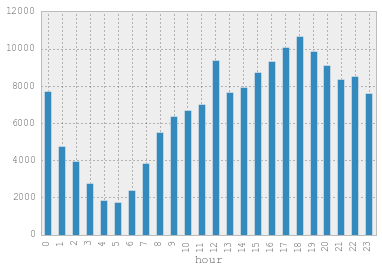

In [18]:
#Crime by hour.
by_hour = sf.groupby('hour').agg(len)['incidntnum']
by_hour.plot(kind='bar')

In [56]:
def crime_ts(crime):
    by_hour = sf[(sf.category == crime)].groupby('hour').agg(len)['incidntnum']
    by_hour.plot(kind='bar')
    plt.xlabel('Hour')
    plt.ylabel('Number of Crimes')
    plt.title('%s by hour' % crime)

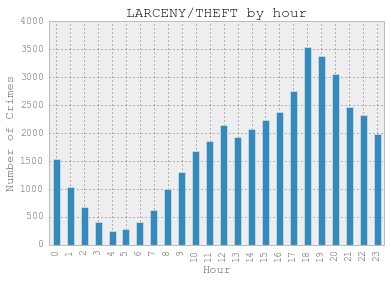

In [73]:
crime_ts('LARCENY/THEFT')

In [29]:
def crime_day(crime):
    #Plot frequency of crime by day
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    by_hour = sf[sf.category == crime].groupby('dayofweek').agg(len)['incidntnum']
    by_hour.ix[days].plot(kind='bar')
    plt.xlabel('Day')
    plt.ylabel('Number of Crimes')
    plt.title('%s by Day' % crime)

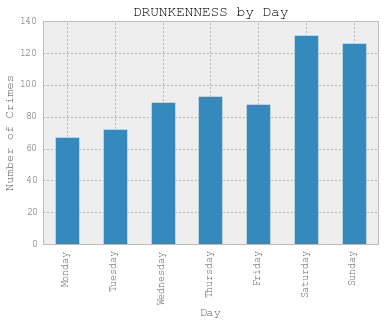

In [36]:
crime_day('DRUNKENNESS')

In [50]:
def crime_month(crime):
    #Plot frequency of particular crime type by Month
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    by_hour = sf[(sf.category == crime) & (sf.year == 2014)].groupby('month').agg(len)['incidntnum']
    by_hour.ix[months].plot(kind='bar')
    plt.xlabel('Month')
    plt.ylabel('Number of Crimes')
    plt.title('%s by Month' % crime)

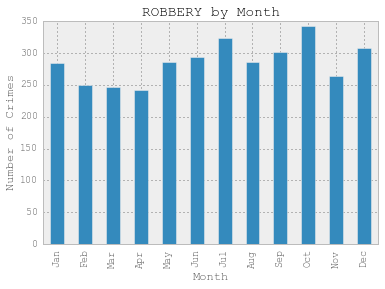

In [54]:
crime_month('ROBBERY')

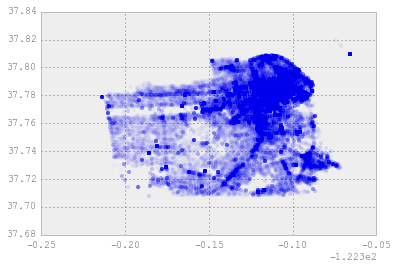

In [61]:
plt.scatter(sf.x, sf.y, alpha=0.01)

In [63]:
sf['monthNum'] = sf.date.apply(lambda x: x.month)
sf.head()

,incidntnum,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location,hour,month,year,monthNum
0,140090226,WARRANTS,ENROUTE TO PAROLE OFFICER,Thursday,2014-01-30 12:00:00,21:56:00,MISSION,"ARREST, BOOKED",400 Block of SOUTH VAN NESS AV,-122.417663,37.766274,"(37.7662744315825, -122.417662868855)",21,Jan,2014,1
1,140584724,NON-CRIMINAL,"LICENSE PLATE, FOUND",Monday,2014-07-14 12:00:00,09:16:00,BAYVIEW,NONE,EVANS AV / MARIN ST,-122.396650,37.748351,"(37.7483507577633, -122.396650247607)",9,Jul,2014,7
2,150053236,TRESPASS,TRESPASSING,Sunday,2015-01-18 12:00:00,00:27:00,MISSION,"ARREST, BOOKED",1000 Block of POTRERO AV,-122.406539,37.756486,"(37.7564864109309, -122.406539115148)",0,Jan,2015,1
3,140797585,VEHICLE THEFT,STOLEN TRUCK,Sunday,2014-09-21 12:00:00,19:00:00,TENDERLOIN,NONE,OFARRELL ST / TAYLOR ST,-122.411328,37.785996,"(37.7859963050476, -122.411328369311)",19,Sep,2014,9
4,140188558,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,2014-03-05 12:00:00,09:30:00,MISSION,NONE,1700 Block of HARRISON ST,-122.413492,37.769083,"(37.7690826019573, -122.413492224653)",9,Mar,2014,3


In [70]:
def heatmap(crime):
    #Construct a heatmap of crime type by month and hour of day
    ct = sf[(sf.category == crime) & (sf.year == 2014)].groupby(['monthNum', 'hour'])['incidntnum'].agg(len).reset_index()
    plt.figure(figsize=(12, 12))
    plt.imshow(np.array(pd.pivot_table(ct, values='incidntnum', index='monthNum', columns='hour')), cmap='RdBu_r', label='Count')
    plt.xlabel('Hour')
    plt.ylabel('Month')
    plt.title('Heatmap of %s' % crime)
    plt.colorbar()

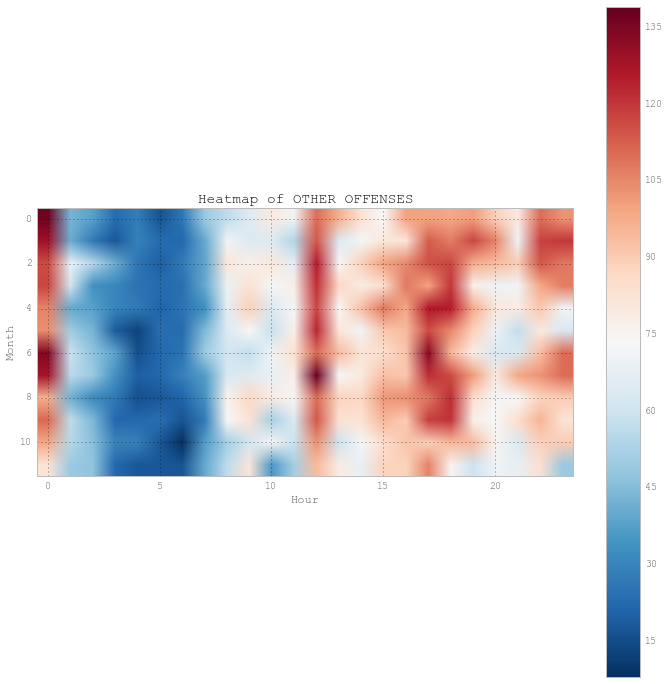

In [74]:
heatmap('OTHER OFFENSES')

In [75]:
sf.resolution.value_counts()[:15]

NONE                                      103924
ARREST, BOOKED                             35594
ARREST, CITED                              10795
PSYCHOPATHIC CASE                           3894
LOCATED                                     3334
UNFOUNDED                                   1725
JUVENILE BOOKED                              983
JUVENILE CITED                               424
EXCEPTIONAL CLEARANCE                        419
COMPLAINANT REFUSES TO PROSECUTE             320
PROSECUTED BY OUTSIDE AGENCY                 161
DISTRICT ATTORNEY REFUSES TO PROSECUTE       148
JUVENILE ADMONISHED                          140
NOT PROSECUTED                               125
CLEARED-CONTACT JUVENILE FOR MORE INFO        85
dtype: int64

In [79]:
openshut = sf[sf.resolution.isin(['NONE', 'ARREST, BOOKED', 'ARREST, CITED'])]
openshut['resolved'] = openshut.resolution.apply(lambda x: 0 if x == 'NONE' else 1)
openshut.tail()

C:\Users\Steve\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


,incidntnum,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location,hour,month,year,monthNum,resolved
162106,141068333,MISSING PERSON,MISSING ADULT,Saturday,2014-12-20 12:00:00,11:00:00,BAYVIEW,NONE,200 Block of WHEELER AV,-122.399717,37.712568,"(37.7125680453156, -122.399717293065)",11,Dec,2014,12,0
162107,146190903,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Thursday,2014-09-18 12:00:00,09:10:00,RICHMOND,NONE,3100 Block of GEARY BL,-122.452643,37.781667,"(37.781666769298, -122.452642959771)",9,Sep,2014,9,0
162108,140739167,BURGLARY,"BURGLARY,STORE UNDER CONSTRUCTION, UNLAWFUL ENTRY",Saturday,2014-08-30 12:00:00,15:00:00,SOUTHERN,NONE,0 Block of SOUTHPARK AV,-122.393093,37.782336,"(37.7823359738287, -122.393092579681)",15,Aug,2014,8,0
162109,141033728,DRUG/NARCOTIC,POSSESSION OF BASE/ROCK COCAINE,Monday,2014-12-08 12:00:00,15:37:00,NORTHERN,"ARREST, BOOKED",OFARRELL ST / LARKIN ST,-122.417904,37.785167,"(37.7851670875517, -122.417903977564)",15,Dec,2014,12,1
162111,146275577,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Saturday,2014-12-13 12:00:00,20:00:00,SOUTHERN,NONE,10TH ST / BRYANT ST,-122.409739,37.770348,"(37.7703482035454, -122.409738771906)",20,Dec,2014,12,0


In [83]:
openshut.groupby('category')['resolved'].agg(np.mean).order(ascending=False)[:15]

category
TREA                           1.000000
WARRANTS                       0.937561
STOLEN PROPERTY                0.927690
DRIVING UNDER THE INFLUENCE    0.920988
DRUG/NARCOTIC                  0.915376
GAMBLING                       0.888889
PROSTITUTION                   0.868778
DRUNKENNESS                    0.809969
WEAPON LAWS                    0.750000
LIQUOR LAWS                    0.748634
OTHER OFFENSES                 0.693148
LOITERING                      0.657895
TRESPASS                       0.625310
BRIBERY                        0.555556
DISORDERLY CONDUCT             0.549072
Name: resolved, dtype: float64

In [84]:
sf.pddistrict.value_counts()

SOUTHERN      31278
MISSION       20907
NORTHERN      19928
CENTRAL       18764
BAYVIEW       14870
INGLESIDE     13861
TENDERLOIN    12386
TARAVAL       11432
PARK          10014
RICHMOND       8672
dtype: int64

In [102]:
def district_crime(district, prop=False):
    group = sf[sf.pddistrict == district].groupby('category').agg(len)['incidntnum'].order(ascending=False)[:10]
    if prop:
        group = group.div(group.sum(axis=0), axis=0)
    group.plot(kind='bar')

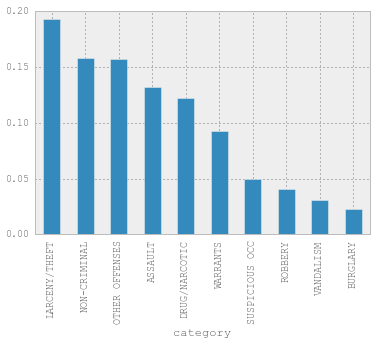

In [104]:
district_crime('TENDERLOIN', True)

In [97]:
def crime_district(crime, prop=False):
    df = sf[sf.category == crime].groupby('pddistrict').agg(len)['incidntnum'].order(ascending=False)
    if prop:
        df = df.div(df.sum(axis=0), axis=0)
    df.plot(kind='bar')

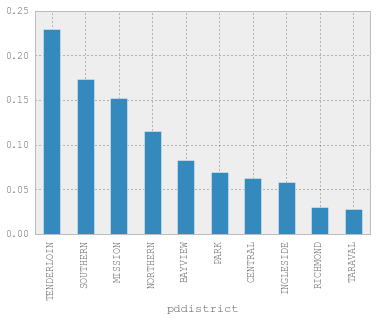

In [101]:
crime_district('DRUG/NARCOTIC', True)

In [15]:
import gmplot

In [16]:
#Draw heatmap of San Francisco crime with Google Maps plotting package.
SF = gmplot.GoogleMapPlotter(37.77, -122.41, 16)
SF.heatmap(sf.y, sf.x)
SF.draw("SFCrime.html")